In [16]:
from glob import glob
import pandas as pd
from tqdm import tnrange, tqdm_notebook

current = pd.read_csv('primaryMarketNotes_browseNotes_1-RETAIL.csv')

files = glob('LoanStats*.csv.zip')

def a_to_d_done(df):
    a_to_d = df['grade'].isin(['A', 'B', 'C', 'D'])
    done = df['loan_status'].isin(['Fully Paid', 'Charged Off'])
    return a_to_d & done

dfs = (pd.read_csv(file, skiprows=1, skipfooter=2, engine='python')
       .where(a_to_d_done)
       .dropna(subset=['grade', 'loan_status'])
       for file in tqdm_notebook(files))

df = pd.concat(dfs)

In [18]:
df.shape

(1283340, 144)

In [21]:
from sklearn.model_selection import train_test_split

historical, _ = train_test_split(df.copy(), train_size=0.30, 
                             stratify=df['loan_status'])

/Users/dwightchurchill/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
historical.to_csv('historical.csv', index=False)

In [23]:
historical.shape

(385002, 144)

In [25]:
common_cols = set(historical.columns) & set(current.columns)
just_historical = set(historical.columns) - set(current.columns)
just_current = set(current.columns) - set(historical.columns)

In [30]:
len(common_cols), len(just_historical), len(just_current)

(102, 42, 20)

In [48]:
just_historical, just_current

({'collection_recovery_fee',
  'debt_settlement_flag',
  'debt_settlement_flag_date',
  'deferral_term',
  'funded_amnt_inv',
  'hardship_amount',
  'hardship_dpd',
  'hardship_end_date',
  'hardship_flag',
  'hardship_last_payment_amount',
  'hardship_length',
  'hardship_loan_status',
  'hardship_payoff_balance_amount',
  'hardship_reason',
  'hardship_start_date',
  'hardship_status',
  'hardship_type',
  'issue_d',
  'last_credit_pull_d',
  'last_pymnt_amnt',
  'last_pymnt_d',
  'loan_status',
  'next_pymnt_d',
  'orig_projected_additional_accrued_interest',
  'out_prncp',
  'out_prncp_inv',
  'payment_plan_start_date',
  'policy_code',
  'pymnt_plan',
  'recoveries',
  'settlement_amount',
  'settlement_date',
  'settlement_percentage',
  'settlement_status',
  'settlement_term',
  'total_pymnt',
  'total_pymnt_inv',
  'total_rec_int',
  'total_rec_late_fee',
  'total_rec_prncp',
  'verification_status',
  'verification_status_joint'},
 {'accept_d',
  'credit_pull_d',
  'disbursem

In [47]:
historical['']

48685       0.00
21883       0.00
72405       0.00
17028       0.00
184826      0.00
248030      0.00
225866      0.00
54388       0.00
15840       0.00
35270       0.00
41646       0.00
346483      0.00
59032       0.00
52960       0.00
10455       0.00
28349       0.00
45816       0.00
22813       0.00
17725       0.00
62660       0.00
30952       0.00
59368      17.60
30178       0.00
94859       0.00
49342       0.00
56376       0.00
142267      0.00
12694       0.00
138722      0.00
25486       0.00
           ...  
45082       0.00
115348      0.00
197640      0.00
15551       0.00
117558      0.00
92453       0.00
14796     229.92
416747      0.00
169768      0.00
152864      0.00
67246       0.00
335029      0.00
22999       0.00
72533       0.00
80090      23.01
20800       0.00
34205       0.00
107614      0.00
74292      17.82
271954     15.00
111869      0.00
275598      0.00
34720       0.00
218949      0.00
114772      0.00
25125       0.00
82950      44.22
107137      0.

In [89]:
features = list(common_cols)
new_feat = ['issue_d', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_pymnt']
[features.append(x) for x in new_feat]

[None, None, None, None, None]

In [90]:
historical.shape, historical[features].shape

((385002, 144), (385002, 107))

In [91]:
subset = historical[features]

In [93]:
subset['percent_paid'] = subset['total_pymnt'] / subset['funded_amnt']

/Users/dwightchurchill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


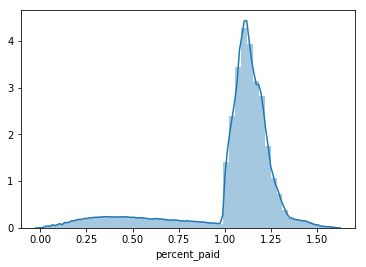

In [97]:
import seaborn as sns

sns.distplot(subset['percent_paid']);